In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# path of log data
log_path = "../work_dirs/KNet/20240601_191045/vis_data/scalars.json"

In [4]:
with open(log_path, "r") as f:
    json_list = f.readlines()

In [5]:
eval(json_list[4])

{'base_lr': 2.3999999999999953e-05,
 'lr': 2.3999999999999953e-05,
 'data_time': 0.004446649551391601,
 'grad_norm': 18.96207914352417,
 'loss': 0.9169559001922607,
 'decode.loss_ce.s0': 0.3816751927137375,
 'decode.acc_seg.s0': 94.703125,
 'decode.loss_ce.s1': 0.11563792303204537,
 'decode.acc_seg.s1': 94.8980712890625,
 'decode.loss_ce.s2': 0.1312304124236107,
 'decode.acc_seg.s2': 91.4051513671875,
 'decode.loss_ce.s3': 0.14877761378884316,
 'decode.acc_seg.s3': 90.5108642578125,
 'aux.loss_ce': 0.13963476046919823,
 'aux.acc_seg': 92.568115234375,
 'time': 1.0241971969604493,
 'iter': 400,
 'memory': 11441,
 'step': 400}

In [6]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in json_list[:-1]:
    if 'aAcc' in each:
        df_test = pd.concat([df_test, pd.DataFrame.from_records([eval(each)])], ignore_index=True)
    else:
        df_train = pd.concat([df_train, pd.DataFrame.from_records([eval(each)])],  ignore_index=True)

In [7]:
df_train.head()

,base_lr,lr,data_time,grad_norm,loss,decode.loss_ce.s0,decode.acc_seg.s0,decode.loss_ce.s1,decode.acc_seg.s1,decode.loss_ce.s2,decode.acc_seg.s2,decode.loss_ce.s3,decode.acc_seg.s3,aux.loss_ce,aux.acc_seg,time,iter,memory,step
0,0.000003,0.000003,0.005054,315.103600,4.369603,0.999245,31.759644,0.998488,47.008789,0.928190,44.094971,1.059261,53.921387,0.384418,49.021729,0.966075,56,12637,56
1,0.000006,0.000006,0.005119,241.451684,3.719837,1.040468,37.319332,0.693868,71.285187,0.723959,73.251869,0.876335,78.304367,0.385206,53.023037,0.994769,100,11441,100
2,0.000012,0.000012,0.004203,87.280351,2.161279,0.878658,62.096340,0.305934,87.636703,0.316990,86.504356,0.365966,84.929031,0.293731,85.442780,1.014394,200,11441,200
3,0.000018,0.000018,0.006260,42.923438,1.661217,0.759989,83.548218,0.204381,94.441528,0.230262,95.103149,0.225286,96.277588,0.241300,89.231812,1.022858,300,11441,300
4,0.000024,0.000024,0.004447,18.962079,0.916956,0.381675,94.703125,0.115638,94.898071,0.131230,91.405151,0.148778,90.510864,0.139635,92.568115,1.024197,400,11441,400


In [8]:
df_test.head()

,aAcc,mIoU,mAcc,mDice,mFscore,mPrecision,mRecall,data_time,time,step
0,96.38,89.60,93.90,94.46,94.46,95.04,93.90,0.111727,0.600436,500
1,97.46,93.08,95.61,96.39,96.39,97.20,95.61,0.015217,0.307555,1000
2,97.64,94.08,96.85,96.92,96.92,96.99,96.85,0.013736,0.308217,1500
3,97.43,93.68,96.21,96.69,96.69,97.22,96.21,0.014223,0.307253,2000
4,97.69,94.14,96.55,96.95,96.95,97.37,96.55,0.018058,0.282379,2500


In [9]:
# ***********************************************************************************
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = 2
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

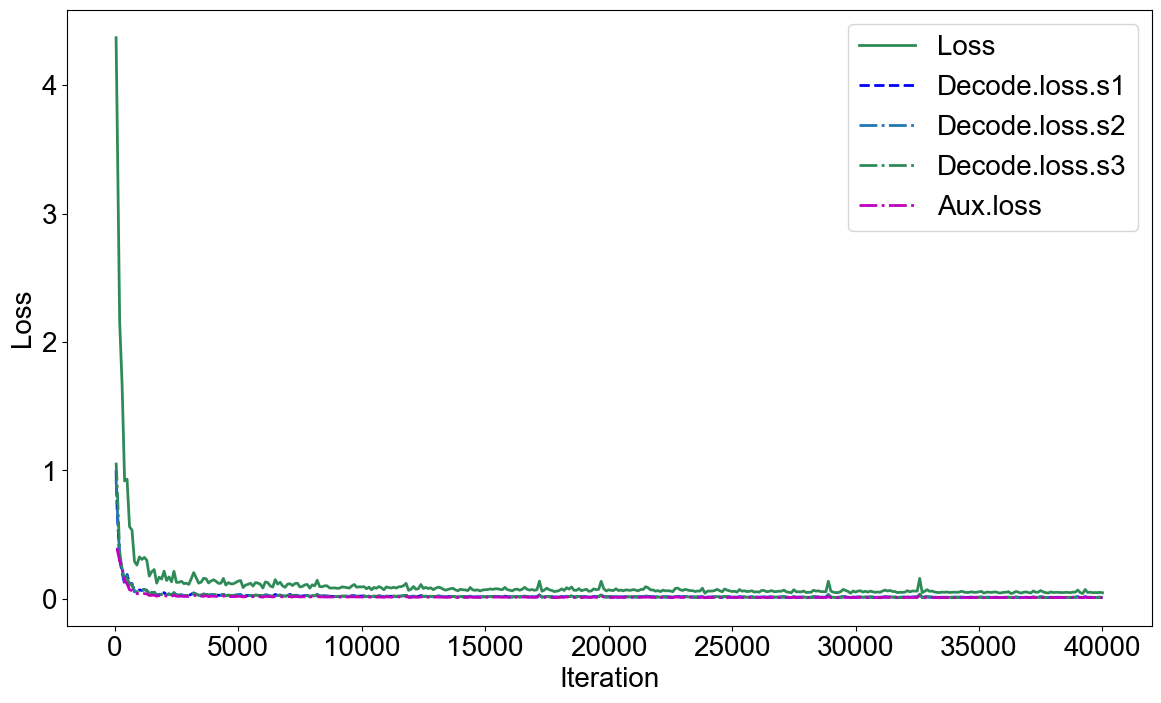

In [10]:
train_metrics = ['loss', 'decode.loss_ce.s1', 'decode.loss_ce.s2', 'decode.loss_ce.s3', 'aux.loss_ce']
figure, ax = plt.subplots(figsize=(14, 8))

x = df_train['step']
for y in train_metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

# ticklabel
plt.tick_params(labelsize=20)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Arial') for label in labels]

# xlabel and ylabel
font_label = {
    'family' : 'Arial',
    'weight' : 'normal',
    'size'   : 20,
}
plt.xlabel('Iteration', font_label)
plt.ylabel('Loss', font_label)
# plt.title('', fontsize=25)

# legend
font_legend = {
    'family' : 'Arial',
    'weight' : 'normal',
    'size'   : 20,
}
plt.legend(['Loss','Decode.loss.s1','Decode.loss.s2','Decode.loss.s3','Aux.loss'], prop=font_legend)

# plt.savefig('图表/训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.show()

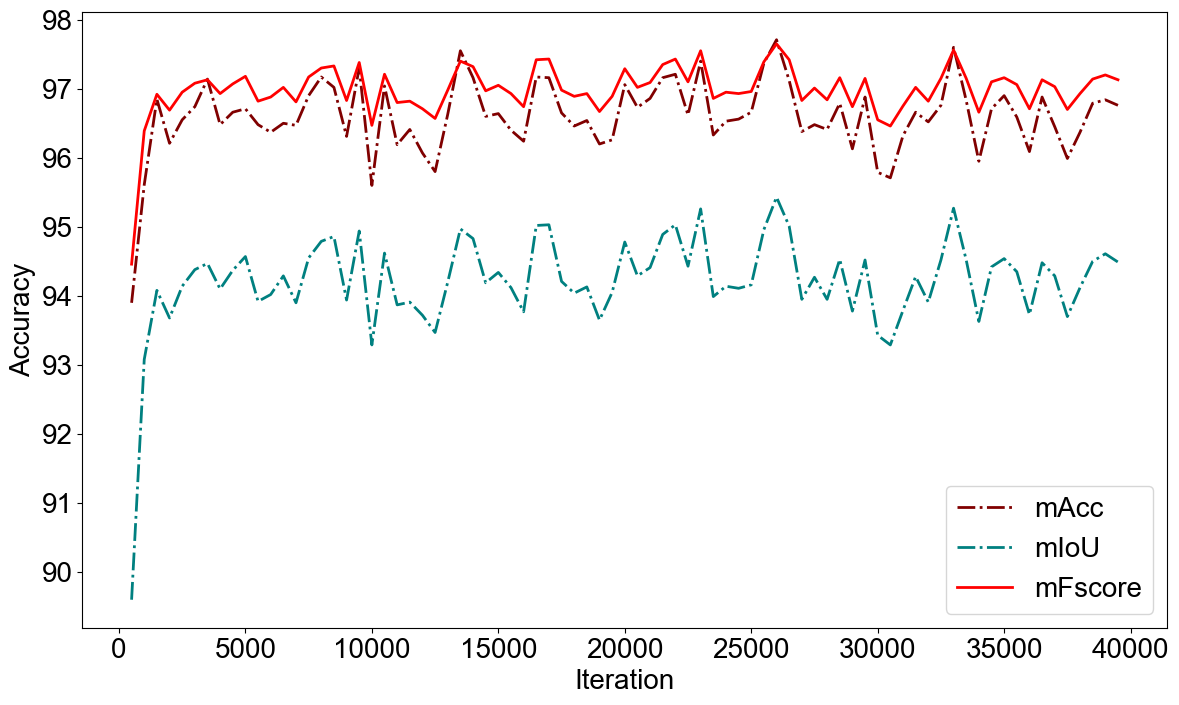

In [11]:
test_metrics = ['mAcc','mIoU', 'mFscore']
figure, ax = plt.subplots(figsize=(14, 8))

x = df_test['step']
for y in test_metrics:
    try:
        plt.plot(x, df_test[y], label=y, **get_line_arg())
    except:
        pass

# ticklabel
plt.tick_params(labelsize=20)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Arial') for label in labels]

# xlabel and ylabel
font_label = {
    'family' : 'Arial',
    'weight' : 'normal',
    'size'   : 20,
}
plt.xlabel('Iteration', font_label)
plt.ylabel('Accuracy', font_label)
# plt.title('', fontsize=25)

# legend
font_legend = {
    'family' : 'Arial',
    'weight' : 'normal',
    'size'   : 20,
}
plt.legend(prop=font_legend)

# plt.savefig('图表/训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.show()

In [13]:
df_train.to_excel("../work_dirs/KNet/20240601_191045/vis_data/training_loss_vis.xlsx")
df_test.to_excel("../work_dirs/KNet/20240601_191045/vis_data/val_loss_vis.xlsx")

## mmyolo

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
# path of log data
log_path = "../../mmdetection/work_dirs/rock_faster_rcnn/best_run/vis_data/scalars.json"
# log_path = "../work_dirs/rock_yolo/best_run/vis_data/scalars.json"
# log_path = "../work_dirs/rock_cbmyolo/best_run/vis_data/scalars.json"
with open(log_path, "r") as f:
    json_list = f.readlines()

In [99]:
eval(json_list[4])

{'lr': 0.0003968193385056234,
 'data_time': 0.3074898628088144,
 'loss': 2.939868982021625,
 'loss_rpn_cls': 0.5841090768002547,
 'loss_rpn_bbox': 0.2137244578737479,
 'loss_cls': 1.4579692551722894,
 'acc': 75.341796875,
 'loss_bbox': 0.6840661569283559,
 'time': 0.7594391107559204,
 'epoch': 2,
 'iter': 26,
 'memory': 6077,
 'step': 26}

In [100]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in json_list[:-1]:
    if 'coco/bbox' in each:
        df_test = pd.concat([df_test, pd.DataFrame.from_records([eval(each)])], ignore_index=True)
    else:
        df_train = pd.concat([df_train, pd.DataFrame.from_records([eval(each)])],  ignore_index=True)

In [101]:
df_train

,lr,data_time,loss,loss_rpn_cls,loss_rpn_bbox,loss_cls,acc,loss_bbox,time,epoch,iter,memory,step
0,0.000063,1.503074,4.920253,2.136246,0.265029,1.967633,5.273438,0.551345,2.322366,1,5,5781,5
1,0.000143,0.752890,4.102785,1.314069,0.253678,1.897809,47.998047,0.637228,1.352792,1,10,6077,10
2,0.000222,0.503162,3.593222,0.923676,0.240330,1.775140,74.902344,0.654076,1.024855,1,15,5781,15
3,0.000302,0.378350,3.214080,0.723141,0.227981,1.602964,76.025391,0.659994,0.862113,1,20,6077,20
4,0.000397,0.307490,2.939869,0.584109,0.213724,1.457969,75.341797,0.684066,0.759439,2,26,6077,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.000010,0.019805,0.209866,0.003738,0.038868,0.055876,97.851562,0.111384,0.400151,399,8378,5781,8378
1596,0.000010,0.027021,0.211360,0.003739,0.038989,0.056447,98.193359,0.112185,0.402466,400,8384,6077,8384
1597,0.000010,0.018876,0.210030,0.003581,0.039073,0.055845,97.900391,0.111531,0.400925,400,8389,5781,8389
1598,0.000010,0.018887,0.205854,0.003229,0.038575,0.054560,98.876953,0.109489,0.402406,400,8394,5781,8394


In [102]:
df_test

,coco/bbox_mAP,coco/bbox_mAP_50,coco/bbox_mAP_75,coco/bbox_mAP_s,coco/bbox_mAP_m,coco/bbox_mAP_l,data_time,time,step
0,0.370,0.497,0.428,0.0,0.053,0.422,0.289402,0.349273,10
1,0.387,0.510,0.440,0.0,0.118,0.429,0.007692,0.059557,20
2,0.398,0.526,0.442,0.0,0.125,0.438,0.007031,0.060355,30
3,0.421,0.551,0.471,0.0,0.110,0.467,0.007477,0.059949,40
4,0.423,0.557,0.491,0.0,0.104,0.468,0.010144,0.064138,50
5,0.426,0.553,0.484,0.0,0.137,0.470,0.007733,0.060292,60
6,0.438,0.568,0.501,0.0,0.132,0.485,0.013578,0.067767,70
7,0.432,0.558,0.476,0.0,0.132,0.478,0.016338,0.073087,80
8,0.436,0.559,0.493,0.0,0.122,0.484,0.008613,0.060782,90
9,0.437,0.562,0.501,0.0,0.126,0.483,0.010263,0.067082,100


In [103]:
# ***********************************************************************************
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = 2
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

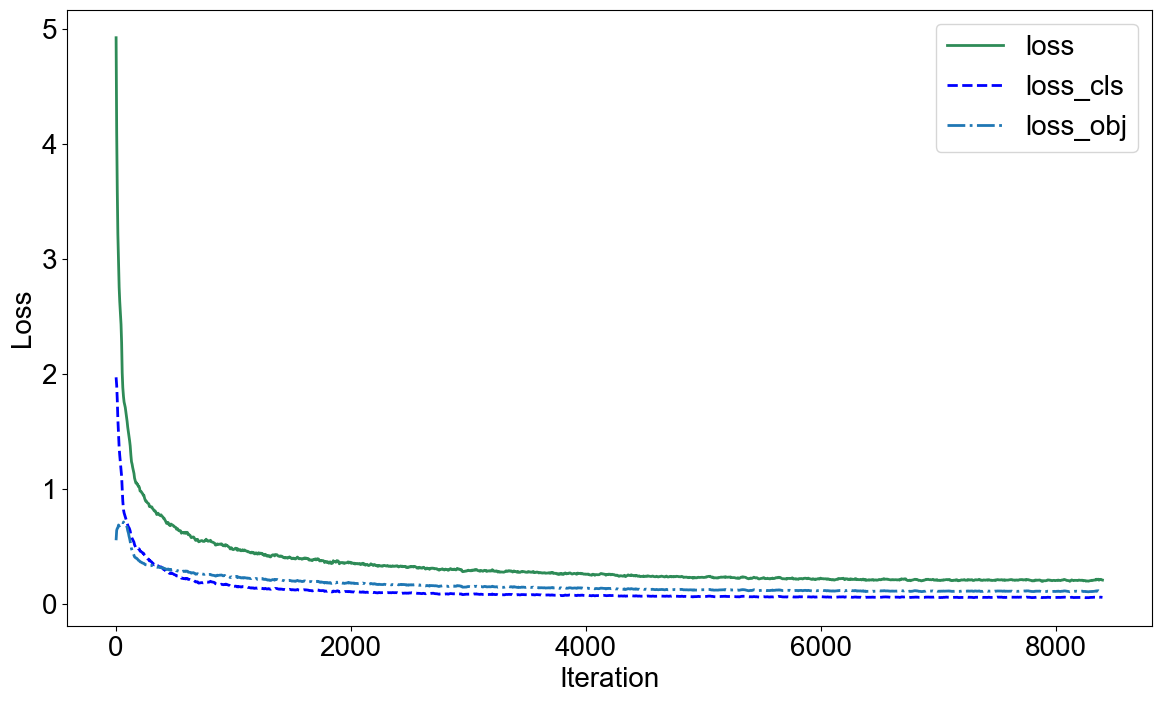

In [104]:
train_metrics = ['loss', 'loss_cls', 'loss_obj', 'loss_bbox']
figure, ax = plt.subplots(figsize=(14, 8))

x = df_train['step']
for y in train_metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

# ticklabel
plt.tick_params(labelsize=20)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Arial') for label in labels]

# xlabel and ylabel
font_label = {
    'family' : 'Arial',
    'weight' : 'normal',
    'size'   : 20,
}
plt.xlabel('Iteration', font_label)
plt.ylabel('Loss', font_label)
# plt.title('', fontsize=25)

# legend
font_legend = {
    'family' : 'Arial',
    'weight' : 'normal',
    'size'   : 20,
}
plt.legend(['loss', 'loss_cls', 'loss_obj', 'loss_bbox'], prop=font_legend)

# plt.savefig('图表/训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.show()

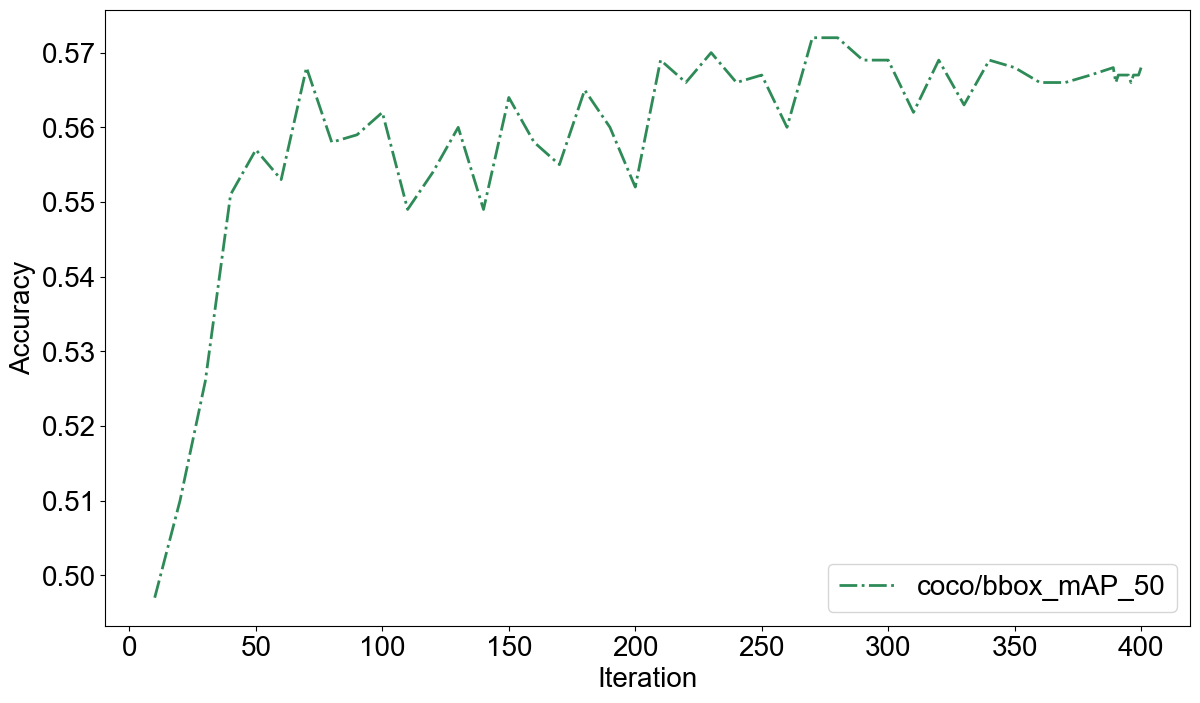

In [105]:
test_metrics = ['coco/bbox_mAP_50']
figure, ax = plt.subplots(figsize=(14, 8))

x = df_test['step']
for y in test_metrics:
    try:
        plt.plot(x, df_test[y], label=y, **get_line_arg())
    except:
        pass

# ticklabel
plt.tick_params(labelsize=20)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Arial') for label in labels]

# xlabel and ylabel
font_label = {
    'family' : 'Arial',
    'weight' : 'normal',
    'size'   : 20,
}
plt.xlabel('Iteration', font_label)
plt.ylabel('Accuracy', font_label)
# plt.title('', fontsize=25)

# legend
font_legend = {
    'family' : 'Arial',
    'weight' : 'normal',
    'size'   : 20,
}
plt.legend(prop=font_legend)

# plt.savefig('图表/训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.show()

In [106]:
df_train.to_excel("../../mmdetection/work_dirs/rock_faster_rcnn/best_run/vis_data/training_loss_vis.xlsx")
df_test.to_excel("../../mmdetection/work_dirs/rock_faster_rcnn/best_run/vis_data/val_loss_vis.xlsx")